<a href="https://colab.research.google.com/github/Debrup10/industryready/blob/main/Logistic_Regression_Imbalanced_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
from sklearn.datasets import make_classification
from collections import Counter

In [7]:
X,y = make_classification(n_samples=1000, n_features=10, n_informative=4,n_clusters_per_class= 1, n_classes=2, weights=[.99],random_state=11)

In [9]:
Counter(y)

Counter({0: 984, 1: 16})

<Axes: xlabel='0', ylabel='1'>

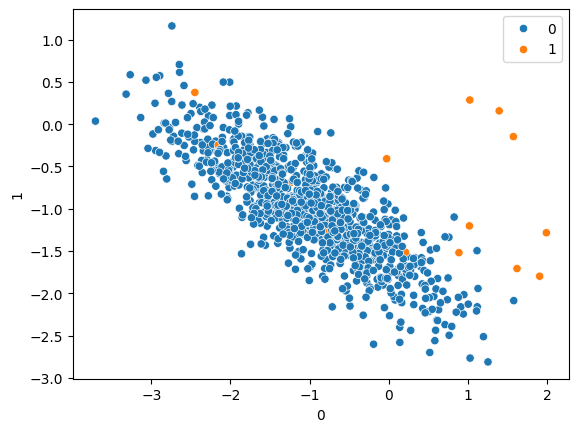

In [8]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [12]:
## Hyper-Parameter Tuning
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{0:w,1:y} for w in [1,10,50,100] for y in [1,10,50,100]]
params = dict(penalty = penalty, solver = solver, C = C, class_weight = class_weight)

In [13]:
params

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
 'class_weight': [{0: 1, 1: 1},
  {0: 1, 1: 10},
  {0: 1, 1: 50},
  {0: 1, 1: 100},
  {0: 10, 1: 1},
  {0: 10, 1: 10},
  {0: 10, 1: 50},
  {0: 10, 1: 100},
  {0: 50, 1: 1},
  {0: 50, 1: 10},
  {0: 50, 1: 50},
  {0: 50, 1: 100},
  {0: 100, 1: 1},
  {0: 100, 1: 10},
  {0: 100, 1: 50},
  {0: 100, 1: 100}]}

In [19]:
## Grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold()
grid = GridSearchCV(estimator = model, param_grid = params, scoring="recall", cv = cv, n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 10},
                                          {0: 1, 1: 50}, {0: 1, 1: 100},
                                          {0: 10, 1: 1}, {0: 10, 1: 10},
                                          {0: 10, 1: 50}, {0: 10, 1: 100},
                                          {0: 50, 1: 1}, {0: 50, 1: 10},
                                          {0: 50, 1: 50}, {0: 50, 1: 100},
                                          {0: 100, 1: 1}, {0: 100, 1: 10},
                                          {0: 100, 1: 50}, {0: 100, 1: 100}],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='recall')

In [20]:
grid.best_params_

{'C': 0.1, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l1', 'solver': 'saga'}

In [21]:
y_pred = grid.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Importing the function

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[246  50]
 [  0   4]]


In [23]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.83      0.91       296
           1       0.07      1.00      0.14         4

    accuracy                           0.83       300
   macro avg       0.54      0.92      0.52       300
weighted avg       0.99      0.83      0.90       300

